In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import math as mt

data = pd.read_csv('realest.csv')
print(data.shape)
data.head()
data_null = data.isna().sum()
plt.figure(figsize=(8,8))


#Mengisi kekosongan dengan median
data.fillna({'Lot':data['Lot'].median()},inplace=True)
data.fillna({'Space':data['Space'].median()},inplace=True)
data.fillna({'Tax':data['Tax'].median()},inplace=True)
data.fillna({'Price':data['Price'].median()},inplace=True)
data.fillna({'Bedroom':data['Bedroom'].median()},inplace=True)
data.fillna({'Room':data['Room'].median()},inplace=True)
data.fillna({'Garage':data['Garage'].median()},inplace=True)
data.fillna({'Condition':data['Condition'].median()},inplace=True)
data.fillna({'Bathroom':data['Bathroom'].median()},inplace=True)

#penentuan jumlah data
data_train = data[:95]   # 60% dari jumlah data digunakan untuk train (total data: 4988)
data_test = data[95:]    # 40% data digunakan untuk test (total data : 4988)

X_train = (data_train.drop(['Tax'], axis=1).values)
y_train = (data_train['Tax'].values.reshape(-1,1))
X_test = (data_test.drop(['Tax'], axis=1).values)
y_test = (data_test['Tax'].values.reshape(-1,1))
print("banyaknya data hilang:","\n",data.isna().sum())

(157, 9)
banyaknya data hilang: 
 Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64


<Figure size 800x800 with 0 Axes>

Proses di atas berfungsi untuk memastikan apakah data dapat digunakan untuk mengetahui apakah data masih dapat digunakan atau tidak, sekaligus mengganti data yang hilang dengan nilai median tiap data. Kemudian jumlah data yang di train akan berjumlah 60% dari total yang ada

In [2]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_train)
c= kmeans.cluster_centers_
print(len(c))
print(X_test.shape[0])

5
62


In [3]:

num_output=y_train.shape[0]

jumlah_clus=5
dj=[]
for j in range (0,len(c)):
        d=cdist(X_train, c, 'sqeuclidean')
        dj.append(d)

c1,c2,c3=[c[0]],[c[2]],c[[4]]
sigma=2*((cdist(c1,c2,'sqeuclidean')+cdist(c1,c3,'sqeuclidean')+cdist(c2,c3,'sqeuclidean'))/3)
sigma=sigma[0][0]
def gaus(dj,sigma):
        return np.exp(-(dj**2)/(2*(sigma**2)))
hj=[]
hd=[]
for j in range (0,len(dj)):
        h=gaus(dj[j],sigma)
        hd.append(h)
hd=hd[0]




Epoch 0: MSE = 91.62681800213474
Epoch 1: MSE = 39.698662800761056
Epoch 2: MSE = 19.218372709771362
Epoch 3: MSE = 10.790298126200632
Epoch 4: MSE = 7.072763589691035
Epoch 5: MSE = 5.325624277359181
Epoch 6: MSE = 4.468003627004298
Epoch 7: MSE = 4.0418563445191955
Epoch 8: MSE = 3.8372151064923776
Epoch 9: MSE = 3.7504921312599837
Epoch 10: MSE = 3.7274781761170273
Epoch 11: MSE = 3.738613521842574
Epoch 12: MSE = 3.7673737603912527
Epoch 13: MSE = 3.8044121357520178
Epoch 14: MSE = 3.8444367321476074
Epoch 15: MSE = 3.884480473188532
Epoch 16: MSE = 3.922919097640457
Epoch 17: MSE = 3.9589056107898313
Epoch 18: MSE = 3.9920419495566843
Epoch 19: MSE = 4.0221875777083325
Epoch 20: MSE = 4.049347719231101
Epoch 21: MSE = 4.073608096215217
Epoch 22: MSE = 4.09509687891791
Epoch 23: MSE = 4.113962574860041
Epoch 24: MSE = 4.1303612580274525
Epoch 25: MSE = 4.144449272152606
Epoch 26: MSE = 4.1563791421350365
Epoch 27: MSE = 4.166297364995366
Epoch 28: MSE = 4.174343300930661
Epoch 29: 

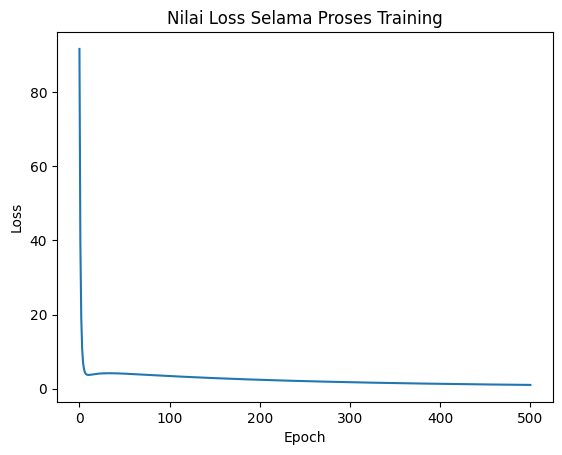

In [4]:

epoh = 500

lr = 0.1

# menginisiasi weight dan bias
np.random.seed(95)  
w = np.random.randn(hd.shape[1], 1)
b = np.random.randn(1)
loss_values=[]

for j in range(epoh + 1):
    MSE = 0
    target_baru=np.zeros(y_train.shape)

    for i in range(hd.shape[0]):
        # melakukan forward
        o = np.matmul(hd[i], w) + b
        e = y_train[i] - o
        target_baru[i]=o.round()
        
        #mulai back propagate
        dw = -2 * hd[i].reshape(-1, 1) * e
        db = -2 * e
        # melakukan koreksi pada weight dan bias
        w = w - lr * dw
        b = b - lr * db

        MSE = np.sum(e**2)
    
    MSE /= hd.shape[0]
    loss_values.append(MSE)
    
    print(f"Epoch {j}: MSE = {MSE}")
plot1 = plt.figure(1)
plt.title('Nilai Loss Selama Proses Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(loss_values)



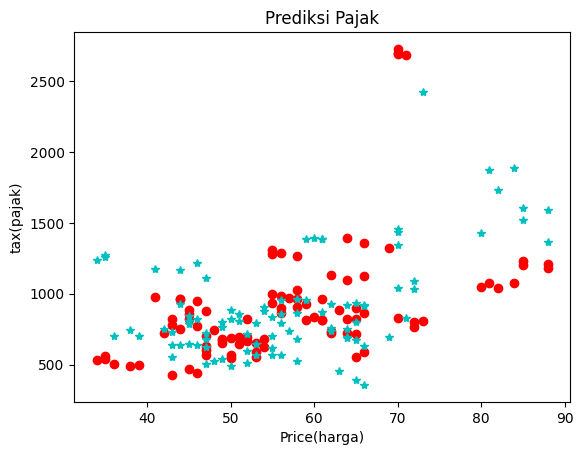

In [5]:
plt.plot(data['Price'].to_numpy()[:95],y_train.reshape(-1,1),'ro')
plt.plot(data['Price'].to_numpy()[:95],target_baru.reshape(-1,1),'c*')
plt.xlabel('Price(harga)')
plt.ylabel('tax(pajak)')
plt.title('Prediksi Pajak')
plt.show()